# Foundations of AI & ML
## Session 05
### Experiment 1 - Part 5
## Mini-batch Gradient Descent

**Objectives:** In this Experiment we will use mini batch algorithm. In every iteration we use a set of 'm' training examples called batch to compute the gradient of the cost function. 

**Expected Time:** This Experiment should take around 15 mins

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stat
%matplotlib notebook
import matplotlib.pyplot as plt
import time

In [2]:
#reading the file
data = pd.read_csv("../Datasets/regr01.txt", sep=" ", header=None, names=['l', 't'])
print(data.head())
print(data.tail())

      l        t
0  0.10  0.69004
1  0.11  0.69497
2  0.12  0.74252
3  0.13  0.75360
4  0.14  0.83568
       l       t
85  0.95  1.9841
86  0.96  2.0066
87  0.97  2.0493
88  0.98  2.0503
89  0.99  2.0214


As explained already we will be plotting $ l $  vs $tsq $ and we will be fitting the line $ l $  vs $tsq $

In [3]:
l = data['l'].values
t = data['t'].values
tsq = t * t

## Mini-Batch Gradient Descent

In Mini-Batch Gradient Descent algorithm, rather than using  the complete data set, in every iteration we use a subset of training examples (called "batch") to compute the gradient of the cost function. 

Common mini-batch sizes range between 50 and 256, but can vary for different applications.

one_batch() : we will be calculating the essenial parts of the Gradient Descent method:  

$y = mx + c$
        
$E$ =$\frac{1}{n}$   $\sum_{i=1}^n (y_i - y)^2$

$\frac{\partial E }{\partial m}$ = $\frac{2}{n}$   $\sum_{i=1}^n  -x_i(y_i - (mx_i + c))$
 
$\frac{\partial E}{\partial c}$ = $\frac{2}{n}$   $\sum_{i=1}^n  -(y_i - (mx_i + c))$

one_step() : We will be splitting our data into batches.

In [4]:
def train_one_batch(x, y, m, c, eta):
    const = - 2.0/len(y)
    ycalc = m * x + c
    delta_m = const * sum(x * (y - ycalc))
    delta_c = const * sum(y - ycalc)
    m = m - delta_m * eta
    c = c - delta_c * eta
    error = sum((y - ycalc)**2)/len(y)
    return m, c, error

def train_batches(x, y, m, c, eta, batch_size):
    # Making the batches
    random_idx = np.arange(len(y))
    np.random.shuffle(random_idx)
    
    # Train each batch
    for batch in range(len(y)//batch_size):
        batch_idx = random_idx[ batch*batch_size : (batch+1)*batch_size ]
        batch_x = x[batch_idx]
        batch_y = y[batch_idx]
        m, c, err = train_one_batch(batch_x, batch_y, m, c, eta)
    
    return m, c, err

def train_minibatch(x, y, m, c, eta, batch_size=10, iterations=1000):
    for iteration in range(iterations):
        m, c, err = train_batches(x, y, m, c, eta, batch_size)
    return m, c, err

## TRAIN

In [5]:
# Init m, c
m, c = 0, 0

In [6]:
# Learning rate
lr = 0.001

In [7]:
# Batch size
batch_size = 10

<IPython.core.display.Javascript object>


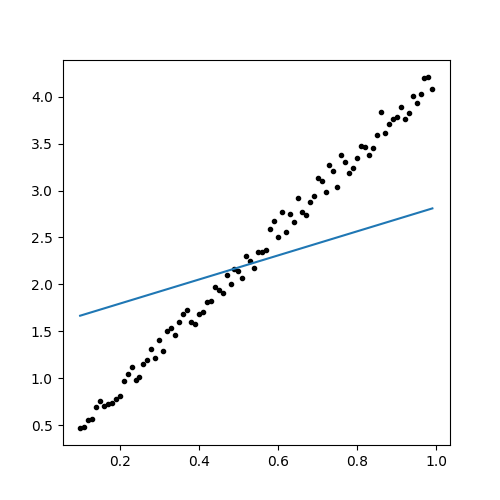

m = 0.276529 c = 0.408341 Error = 4.1726
m = 0.49608 c = 0.718257 Error = 2.71618
m = 0.671759 c = 0.952549 Error = 1.8504
m = 0.813639 c = 1.12874 Error = 1.33379
m = 0.929467 c = 1.26031 Error = 1.02365
m = 1.0252 c = 1.35762 Error = 0.835624
m = 1.10541 c = 1.42863 Error = 0.719865
m = 1.17362 c = 1.47945 Error = 0.646911
m = 1.23254 c = 1.51479 Error = 0.599347
m = 1.28426 c = 1.53828 Error = 0.566879


In [8]:
# Training for 1000 iterations, plotting after every 100 iterations:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
plt.ion()
fig.show()
fig.canvas.draw()

for num in range(10):
    m, c, error = train_minibatch(l, tsq, m, c, lr, batch_size=90, iterations=100)
    print("m = {0:.6} c = {1:.6} Error = {2:.6}".format(m, c, error))
    y = m * l + c
    ax.clear()
    ax.plot(l, tsq, '.k')
    ax.plot(l, y)
    fig.canvas.draw()
    time.sleep(1)

**Exercise: Experiment with other lr values.**

<IPython.core.display.Javascript object>


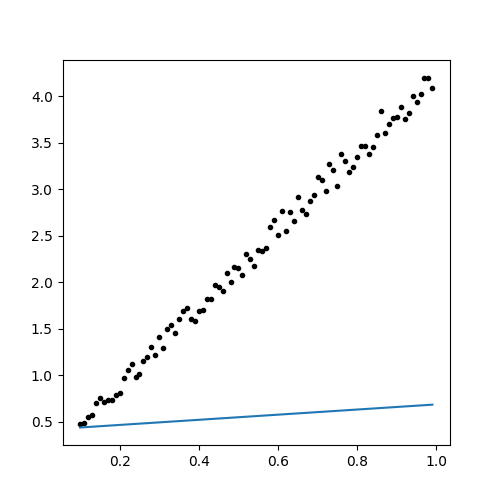

m = 0.0306346 c = 0.0459904 Error = 6.29443
m = 0.0605538 c = 0.0907434 Error = 6.0045
m = 0.0897761 c = 0.134291 Error = 5.72934
m = 0.11832 c = 0.176664 Error = 5.4682
m = 0.146202 c = 0.217894 Error = 5.22036
m = 0.17344 c = 0.25801 Error = 4.98514
m = 0.20005 c = 0.297041 Error = 4.76189
m = 0.226048 c = 0.335014 Error = 4.55
m = 0.251451 c = 0.371959 Error = 4.34889
m = 0.276274 c = 0.407901 Error = 4.158


In [11]:
lr = 0.0001 # Low LR will take forever and doesnt even converge
m, c = 0, 0 # Initialize m, c - forget the previous data!

# Training for 1000 iterations, plotting after every 100 iterations:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
plt.ion()
fig.show()
fig.canvas.draw()

for num in range(10):
    m, c, error = train_minibatch(l, tsq, m, c, lr, batch_size=90, iterations=100)
    print("m = {0:.6} c = {1:.6} Error = {2:.6}".format(m, c, error))
    y = m * l + c
    ax.clear()
    ax.plot(l, tsq, '.k')
    ax.plot(l, y)
    fig.canvas.draw()
    time.sleep(1)

<IPython.core.display.Javascript object>


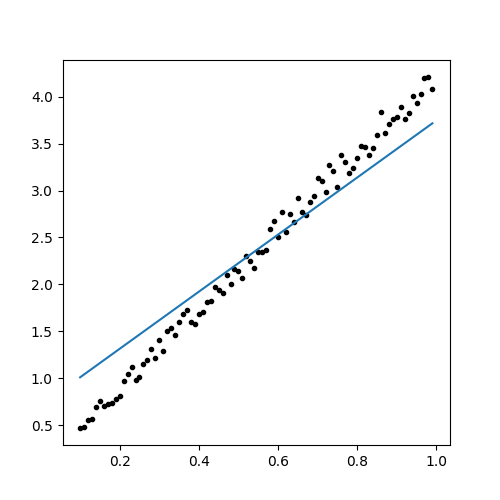

m = 1.28677 c = 1.54235 Error = 0.567336
m = 1.62739 c = 1.50603 Error = 0.438432
m = 1.87741 c = 1.37352 Error = 0.358112
m = 2.099 c = 1.24699 Error = 0.292845
m = 2.29864 c = 1.13234 Error = 0.239713
m = 2.47876 c = 1.02887 Error = 0.196459
m = 2.64127 c = 0.9355 Error = 0.161247
m = 2.78789 c = 0.851259 Error = 0.132582
m = 2.92019 c = 0.775251 Error = 0.109246
m = 3.03955 c = 0.706672 Error = 0.0902493


In [12]:
lr = 0.01 # Much better fit than .0001 and .001 with same number of iterations i.e. 1000
m, c = 0, 0 # Initialize m, c - forget the previous data!

# Training for 1000 iterations, plotting after every 100 iterations:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
plt.ion()
fig.show()
fig.canvas.draw()

for num in range(10):
    m, c, error = train_minibatch(l, tsq, m, c, lr, batch_size=90, iterations=100)
    print("m = {0:.6} c = {1:.6} Error = {2:.6}".format(m, c, error))
    y = m * l + c
    ax.clear()
    ax.plot(l, tsq, '.k')
    ax.plot(l, y)
    fig.canvas.draw()
    time.sleep(1)

**Exercise: Experiment with other batch_size values.**

<IPython.core.display.Javascript object>


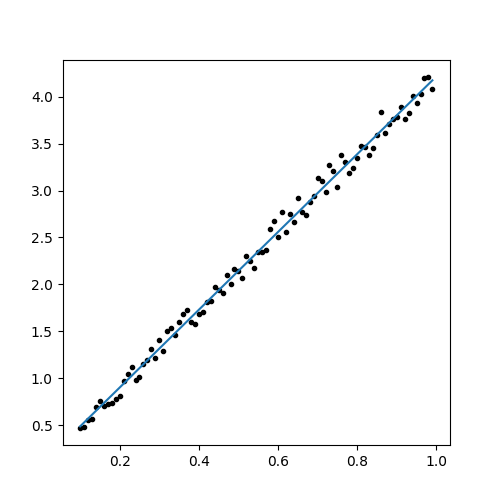

m = 3.03955 c = 0.706672 Error = 0.0902493
m = 3.74749 c = 0.29994 Error = 0.0177016
m = 4.00061 c = 0.154515 Error = 0.00842717
m = 4.09112 c = 0.102518 Error = 0.00724152
m = 4.12348 c = 0.083927 Error = 0.00708995
m = 4.13505 c = 0.0772798 Error = 0.00707057
m = 4.13918 c = 0.0749031 Error = 0.00706809
m = 4.14066 c = 0.0740533 Error = 0.00706778
m = 4.14119 c = 0.0737495 Error = 0.00706774
m = 4.14138 c = 0.0736409 Error = 0.00706773


In [13]:
lr = 0.01 # Much better fit than .0001 and .001 with same number of iterations i.e. 1000
m, c = 0, 0 # Initialize m, c - forget the previous data!

# Training for 1000 iterations, plotting after every 100 iterations:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
plt.ion()
fig.show()
fig.canvas.draw()

for num in range(10):
    m, c, error = train_minibatch(l, tsq, m, c, lr, batch_size=90, iterations=1000) # Increasing iterations to 1000
    print("m = {0:.6} c = {1:.6} Error = {2:.6}".format(m, c, error))
    y = m * l + c
    ax.clear()
    ax.plot(l, tsq, '.k')
    ax.plot(l, y)
    fig.canvas.draw()
    time.sleep(1)

# With lr = .01 and num iterations = 10k, we get a much better fit





## Plotting error vs iterations

<IPython.core.display.Javascript object>


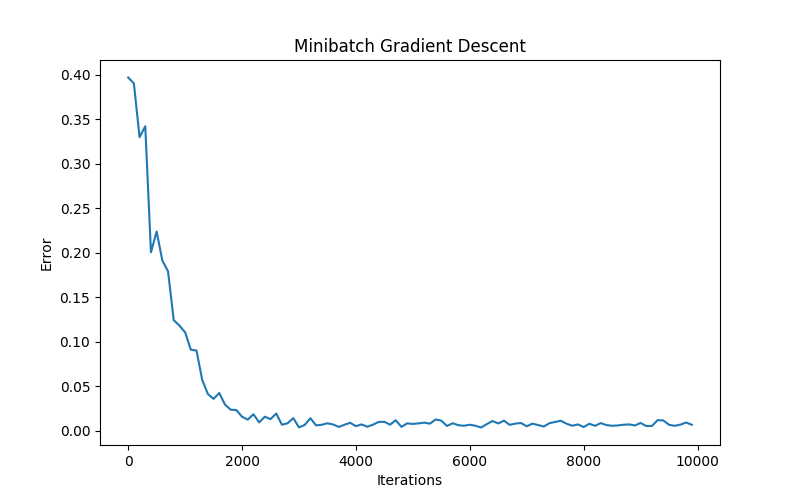

In [9]:
ms, cs,errs = [], [], []
m, c = 0, 0
lr = 0.001
batch_size = 10
for times in range(100):
    m, c, error = train_minibatch(l, tsq, m, c, lr, batch_size, iterations=100) # We will plot the value of for every 100 iterations
    ms.append(m)
    cs.append(c)
    errs.append(error)
epoch = range(0, 10000, 100)
plt.figure(figsize=(8, 5))
plt.plot(epoch, errs)
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.title("Minibatch Gradient Descent")
plt.show()

**Exercise: Is this better than sequential gradient descent and vanilla gradient descent?**

Hint - check the error value at saturation, and time it takes to reach saturation.

#### Last Error at saturation: 0.006
Accuracy is not as great at .005 as Stochastic GD (.0004), but this is much faster